# Importando bibliotecas

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import numpy as np

# Cria DataFrame com os dados PNAD & ajusta tabela

In [2]:
# Carregar o arquivo CSV como um DataFrame pandas
df = pd.read_csv(r'C:\Users\cqueiroz\OneDrive - Capgemini\Documents\2. docsCamila\repos2\3_tech_challenge_big_data_fiap\bases\base_tratada_pnad.csv')
df.head()

C:\Users\cqueiroz\AppData\Local\Temp\ipykernel_34708\3168470788.py:2: DtypeWarning: Columns (5,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\cqueiroz\OneDrive - Capgemini\Documents\2. docsCamila\repos2\3_tech_challenge_big_data_fiap\bases\base_tratada_pnad.csv')


,ANOMES,ANO_PESQUISA,MES_PESQUISA,SEMANA_MES,UF,CAPITAL,REGIAO_METROPOLITANA,SITU_DOMICILIO,TIPO_AREA,IDADE_MORADOR,...,SE_TEVE_PERDA_PALADAR,SE_TEVE_DOR_MUSCULAR,SE_TEVE_DIARREIA,FOI_AO_MEDICO,FOI_SEDADO_ENTUBADO,TEM_PLANO_SAUDE,QUAL_RESULTADO,MEDIDA_RESTRICAO,TRABALHO_REMOTO,AUXILIO_EMERGENCIAL_COVID
0,202007,2020,7,3,Santa Catarina,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",33,...,Não,Não,Não,Não aplicável,Não aplicável,Não,Não aplicável,Ignorado,Não aplicável,Não
1,202007,2020,7,3,Santa Catarina,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",70,...,Ignorado,Ignorado,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Não
2,202007,2020,7,2,Espírito Santo,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",63,...,Não,Não,Não,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Sim
3,202007,2020,7,3,Minas Gerais,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",82,...,Ignorado,Ignorado,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Não
4,202007,2020,7,4,Ceará,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",12,...,Ignorado,Ignorado,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Sim


In [3]:
# Substituir valores nulos nas colunas CAPITAL e REGIAO_METROPOLITANA por "Não Informado"
df['CAPITAL'].fillna('Não Informado', inplace=True)
df['REGIAO_METROPOLITANA'].fillna('Não Informado', inplace=True)

# Substituir valores nulos nas colunas MEDIDA_RESTRICAO e SE_TEVE_DIARREIA por "Ignorado"
df['MEDIDA_RESTRICAO'].fillna('Ignorado', inplace=True)
df['SE_TEVE_DIARREIA'].fillna('Ignorado', inplace=True)

# Dicionário de mapeamento de estados para regiões
mapeamento_regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Função para mapear estados para regiões
def mapear_regiao(uf):
    for regiao, estados in mapeamento_regioes.items():
        if uf in estados:
            return regiao
    return 'Região não especificada'  # Para casos em que a coluna UF está vazia ou não especificada

# Criar coluna 'REGIAO' usando a função de mapeamento
df['REGIAO'] = df['UF'].apply(mapear_regiao)

# Definir as faixas etárias
faixas_etarias = [0, 12, 17, 35, 59, 150]  # Faixas etárias para criança, adolescente, jovem, adulto e idoso
labels_faixas_etarias = ['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso']

# Criar a coluna de faixa etária usando a função pd.cut()
df['FAIXA_ETARIA'] = pd.cut(df['IDADE_MORADOR'], bins=faixas_etarias, labels=labels_faixas_etarias, right=False)

# Agora você tem uma nova coluna 'FAIXA_ETARIA' no DataFrame 'dados'


In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}':")
    print(unique_values)
    print()

Valores únicos na coluna 'ANOMES':
[202007 202006 202005]

Valores únicos na coluna 'ANO_PESQUISA':
[2020]

Valores únicos na coluna 'MES_PESQUISA':
[7 6 5]

Valores únicos na coluna 'SEMANA_MES':
[3 2 4 1]

Valores únicos na coluna 'UF':
['Santa Catarina' 'Espírito Santo' 'Minas Gerais' 'Ceará' 'Rondônia'
 'Mato Grosso do Sul' 'Pernambuco' 'Pará' 'Maranhão' 'Alagoas' 'Amapá'
 'Tocantins' 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Rio Grande do Sul'
 'Mato Grosso' 'Roraima' 'Rio Grande do Norte' 'Goiás' 'Paraíba'
 'Amazonas' 'Sergipe' 'Bahia' 'Acre' 'Piauí' 'Distrito Federal']

Valores únicos na coluna 'CAPITAL':
['Não Informado' 'Município de Natal (RN)' 'Município de Belém (PA)'
 'Município de Manaus (AM)' 'Município de Palmas (TO)'
 'Município de Recife (PE)' 'Município de Aracaju (SE)'
 'Município de Cuiabá (MT)' 'Município de Macapá (AP)'
 'Município de Maceió (AL)' 'Município de Curitiba (PR)'
 'Município de Goiânia (GO)' 'Município de Salvador (BA)'
 'Município de Teresina (PI)' 'Mu

In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}")

ANOMES
ANO_PESQUISA
MES_PESQUISA
SEMANA_MES
UF
CAPITAL
REGIAO_METROPOLITANA
SITU_DOMICILIO
TIPO_AREA
IDADE_MORADOR
SEXO
COR_RACA
ESCOLARIDADE
SE_TEVE_FEBRE
SE_TEVE_TOSSE
SE_TEVE_DOR_GARGANTA
SE_TEVE_FALTA_AR
SE_TEVE_DOR_CABECA
SE_TEVE_DOR_PEITO
SE_TEVE_NAUSEA
SE_TEVE_NARIZ_ENTUPIDO
SE_TEVE_FADIGA
SE_TEVE_DOR_OLHOS
SE_TEVE_PERDA_PALADAR
SE_TEVE_DOR_MUSCULAR
SE_TEVE_DIARREIA
FOI_AO_MEDICO
FOI_SEDADO_ENTUBADO
TEM_PLANO_SAUDE
QUAL_RESULTADO
MEDIDA_RESTRICAO
TRABALHO_REMOTO
AUXILIO_EMERGENCIAL_COVID
REGIAO
FAIXA_ETARIA


In [6]:
df.head(1)

,ANOMES,ANO_PESQUISA,MES_PESQUISA,SEMANA_MES,UF,CAPITAL,REGIAO_METROPOLITANA,SITU_DOMICILIO,TIPO_AREA,IDADE_MORADOR,...,SE_TEVE_DIARREIA,FOI_AO_MEDICO,FOI_SEDADO_ENTUBADO,TEM_PLANO_SAUDE,QUAL_RESULTADO,MEDIDA_RESTRICAO,TRABALHO_REMOTO,AUXILIO_EMERGENCIAL_COVID,REGIAO,FAIXA_ETARIA
0,202007,2020,7,3,Santa Catarina,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",33,...,Não,Não aplicável,Não aplicável,Não,Não aplicável,Ignorado,Não aplicável,Não,Sul,Jovem


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920688 entries, 0 to 920687
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ANOMES                     920688 non-null  int64   
 1   ANO_PESQUISA               920688 non-null  int64   
 2   MES_PESQUISA               920688 non-null  int64   
 3   SEMANA_MES                 920688 non-null  int64   
 4   UF                         920688 non-null  object  
 5   CAPITAL                    920688 non-null  object  
 6   REGIAO_METROPOLITANA       920688 non-null  object  
 7   SITU_DOMICILIO             920688 non-null  object  
 8   TIPO_AREA                  920688 non-null  object  
 9   IDADE_MORADOR              920688 non-null  int64   
 10  SEXO                       920688 non-null  object  
 11  COR_RACA                   920688 non-null  object  
 12  ESCOLARIDADE               920688 non-null  object  
 13  SE_TEVE_FEBRE 

# Gerando Graficos


In [8]:
def plot_bar(df, x, dict_map={}, title=None, top_n=None):
    
    # Calcula as contagens e porcentagens
    counts = df[x].value_counts(normalize=True) * 100

    # Seleciona as top_n categorias mais comuns, se especificado
    if top_n is not None:
        counts = counts.head(top_n)

    # Aplica o mapeamento, se fornecido
    if dict_map:
        counts.index = counts.index.map(dict_map)

    # Cria o DataFrame para plotagem
    data = pd.DataFrame({'x': counts.index, 'percent': counts.values})

    # Plotagem com Plotly
    fig = px.bar(data, x='x', y='percent', text='percent', color='x', labels={'x': x, 'percent': 'Porcentagem'})
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.update_layout(title=title if title else f'Distribuição de Casos Por {x}', xaxis_title=None, yaxis_title='Porcentagem')
    fig.show()


In [9]:
plot_bar(df, 'REGIAO', title='Distribuição de Casos Investigados Por Região', top_n=5)

In [10]:
plot_bar(df, "UF", title='Distribuição de Casos Investigados Por Estado')

In [11]:
plot_bar(df, "SITU_DOMICILIO", title = 'Distribuição De Casos Investigados Por Situação do Domicílio')

In [12]:
plot_bar(df, "IDADE_MORADOR", title='Distribuição De Registro de Casos Investigados Por idade')

In [13]:
plot_bar(df, "FAIXA_ETARIA", title = 'Distribuição De Casos Investigados Por Faixa Etaria')

c:\Program Files\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [14]:
plot_bar(df, "SEXO", title = 'Distribuição De Casos Investigados Por Gênero')

In [15]:
plot_bar(df, "COR_RACA", title = 'Distribuição De Casos Investigados Por Etnia')

In [16]:
plot_bar(df, "ESCOLARIDADE", title = 'Distribuição De Casos Investigados Por Escolaridade')

In [17]:
plot_bar(df, "QUAL_RESULTADO", title = 'Distribuição De Casos Investigados Por Resultado (SWAB)')

In [18]:
plot_bar(df, "TRABALHO_REMOTO", title = 'Distribuição De Casos Investigados Por Modalidade de Trabalho (Remoto ou Não)')

In [19]:
plot_bar(df, "AUXILIO_EMERGENCIAL_COVID", title = 'Distribuição De Casos Investigados Por Beneficiários do Auxílio Emergencial')

In [20]:
# Mapeamento para substituir os valores 'Sim'
map_sim = {'Não ': 'Não', 'Ignorado': 'Ignorado', 'Não sabe': 'Não sabe', 'Sim': 'Sim'}

# Exemplo de uso com a variável 'SE_TEVE_FEBRE'
plot_bar(df, 'SE_TEVE_FEBRE', dict_map=map_sim, title='Distribuição de Casos Investigados - Sintoma: Com febre', top_n=5)


In [21]:
def plot_bar_sintomas(df, sintomas, title=None):
    # Criar listas vazias para armazenar os resultados
    sintoma_list = []
    percent_sim_list = []

    # Para cada sintoma
    for sintoma in sintomas:
        # Contar o número de casos 'Sim' para o sintoma atual
        num_sim = (df[sintoma] == 'Sim').sum()

        # Calcular a porcentagem de casos 'Sim' para o sintoma atual
        percent_sim = (num_sim / len(df)) * 100

        # Adicionar os resultados às listas
        sintoma_list.append(sintoma.replace('SE_TEVE_', ''))
        percent_sim_list.append(percent_sim)

    # Criar um DataFrame com os resultados
    data = pd.DataFrame({'Sintoma': sintoma_list, 'Porcentagem': percent_sim_list})

    # Plotagem com Plotly
    fig = px.bar(data, x='Sintoma', y='Porcentagem', text='Porcentagem', labels={'Sintoma': 'Sintoma', 'Porcentagem': 'Porcentagem'})
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.update_layout(title=title if title else 'Porcentagem de casos positivos para cada sintoma')
    #fig.show()

# Exemplo de uso com os sintomas
sintomas = ['SE_TEVE_FEBRE', 'SE_TEVE_TOSSE', 'SE_TEVE_DOR_GARGANTA', 'SE_TEVE_FALTA_AR', 'SE_TEVE_DOR_CABECA', 'SE_TEVE_DOR_PEITO', 'SE_TEVE_NAUSEA', 'SE_TEVE_NARIZ_ENTUPIDO', 'SE_TEVE_FADIGA', 'SE_TEVE_DOR_OLHOS', 'SE_TEVE_PERDA_PALADAR', 'SE_TEVE_DOR_MUSCULAR', 'SE_TEVE_DIARREIA']
plot_bar_sintomas(df, sintomas)


In [22]:
def plot_bar_gender(df, sintomas, title=None):
    data = {'Sintoma': [], 'Sexo': [], 'Porcentagem': []}

    for sintoma in sintomas:
        for sexo in df['SEXO'].unique():
            total_sexo = len(df[df['SEXO'] == sexo])
            total_sim = len(df[(df[sintoma] == 'Sim') & (df['SEXO'] == sexo)])
            percent_sim = (total_sim / total_sexo) * 100
            data['Sintoma'].append(sintoma.replace('SE_TEVE_', ''))
            data['Sexo'].append(sexo)
            data['Porcentagem'].append(percent_sim)

    df_plot = pd.DataFrame(data)

    fig = px.bar(df_plot, x='Sintoma', y='Porcentagem', color='Sexo', barmode='group',
                 text='Porcentagem', labels={'Sintoma': 'Sintoma', 'Porcentagem': 'Porcentagem'})
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.update_layout(title=title if title else 'Porcentagem de casos positivos para cada sintoma separados por sexo')
    #fig.show()

# Exemplo de uso com os sintomas
sintomas = ['SE_TEVE_FEBRE', 'SE_TEVE_TOSSE', 'SE_TEVE_DOR_GARGANTA', 'SE_TEVE_FALTA_AR', 'SE_TEVE_DOR_CABECA', 'SE_TEVE_DOR_PEITO', 'SE_TEVE_NAUSEA', 'SE_TEVE_NARIZ_ENTUPIDO', 'SE_TEVE_FADIGA', 'SE_TEVE_DOR_OLHOS', 'SE_TEVE_PERDA_PALADAR', 'SE_TEVE_DOR_MUSCULAR', 'SE_TEVE_DIARREIA']
plot_bar_gender(df, sintomas)



In [23]:
def plot_bar_gender(df, column, sintomas, title=None):
    data = {'Sintoma': [], 'Faixa Etária': [], 'Sexo': [], 'Porcentagem': []}

    for sintoma in sintomas:
        for sexo in df['SEXO'].unique():
            for faixa_etaria in df['FAIXA_ETARIA'].unique():
                total = len(df[(df['SEXO'] == sexo) & (df['FAIXA_ETARIA'] == faixa_etaria)])
                total_sim = len(df[(df[sintoma] == 'Sim') & (df['SEXO'] == sexo) & (df['FAIXA_ETARIA'] == faixa_etaria)])
                percent_sim = (total_sim / total) * 100 if total > 0 else 0
                data['Sintoma'].append(sintoma.replace('SE_TEVE_', ''))
                data['Faixa Etária'].append(faixa_etaria)
                data['Sexo'].append(sexo)
                data['Porcentagem'].append(percent_sim)

    df_plot = pd.DataFrame(data)

    fig = px.bar(df_plot, x='Sintoma', y='Porcentagem', color='Faixa Etária', barmode='group',
                 facet_col='Sexo', facet_col_wrap=2,
                 text='Porcentagem', labels={'Sintoma': 'Sintoma', 'Porcentagem': 'Porcentagem'},
                 title=title if title else 'Porcentagem de casos positivos para cada sintoma separados por faixa etária e sexo')
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    #fig.show()

# Exemplo de uso com os sintomas
sintomas = ['SE_TEVE_FEBRE', 'SE_TEVE_TOSSE', 'SE_TEVE_DOR_GARGANTA', 'SE_TEVE_FALTA_AR', 'SE_TEVE_DOR_CABECA', 'SE_TEVE_DOR_PEITO', 'SE_TEVE_NAUSEA', 'SE_TEVE_NARIZ_ENTUPIDO', 'SE_TEVE_FADIGA', 'SE_TEVE_DOR_OLHOS', 'SE_TEVE_PERDA_PALADAR', 'SE_TEVE_DOR_MUSCULAR', 'SE_TEVE_DIARREIA']
plot_bar_gender(df, 'FAIXA_ETARIA', sintomas)


In [24]:
def plot_mult_bar(df, column, sintomas, title=None):
    data = {'Sintoma': [], column: [], 'Porcentagem': []}

    for sintoma in sintomas:
        for category_value in df[column].unique():
            total = len(df[df[column] == category_value])
            total_sim = len(df[(df[sintoma] == 'Sim') & (df[column] == category_value)])
            percent_sim = (total_sim / total) * 100 if total > 0 else 0
            data['Sintoma'].append(sintoma.replace('SE_TEVE_', ''))
            data[column].append(category_value)
            data['Porcentagem'].append(percent_sim)

    df_plot = pd.DataFrame(data)

    fig = px.bar(df_plot, x='Sintoma', y='Porcentagem', color=column, barmode='group',
                 text='Porcentagem', labels={'Sintoma': 'Sintoma', 'Porcentagem': 'Porcentagem'},
                 title=title if title else f'Porcentagem de casos positivos para cada sintoma separados por {column}')
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.show()

sintomas = ['SE_TEVE_FEBRE', 'SE_TEVE_TOSSE', 'SE_TEVE_DOR_GARGANTA', 'SE_TEVE_FALTA_AR', 'SE_TEVE_DOR_CABECA', 'SE_TEVE_DOR_PEITO', 'SE_TEVE_NAUSEA', 'SE_TEVE_NARIZ_ENTUPIDO', 'SE_TEVE_FADIGA', 'SE_TEVE_DOR_OLHOS', 'SE_TEVE_PERDA_PALADAR', 'SE_TEVE_DOR_MUSCULAR', 'SE_TEVE_DIARREIA']

In [25]:
plot_mult_bar(df, 'SEXO', sintomas)

In [ ]:
plot_mult_bar(df, 'SEXO', sintomas)

In [26]:
plot_mult_bar(df, 'ESCOLARIDADE', sintomas)

In [27]:
plot_mult_bar(df, 'FAIXA_ETARIA', sintomas)

In [28]:
plot_mult_bar(df, 'REGIAO', sintomas)

In [29]:
plot_mult_bar(df, 'SITU_DOMICILIO', sintomas)

In [30]:
plot_mult_bar(df, 'MEDIDA_RESTRICAO', sintomas)


In [31]:
plot_mult_bar(df, 'QUAL_RESULTADO', sintomas)

In [32]:
def plot_qual_resultado_regiao_percentual(df, title=None):
    # Filtrando o DataFrame para excluir a categoria "Não aplicável"
    df_filtered = df[df['QUAL_RESULTADO'] != 'Não aplicável']

    # Contagem total de casos por região
    df_total_regiao = df_filtered.groupby('REGIAO').size().reset_index(name='total_regiao')

    # Contagem dos casos por resultado do teste e região
    df_counts = df_filtered.groupby(['QUAL_RESULTADO', 'REGIAO']).size().reset_index(name='count')

    # Mesclando as contagens com a contagem total por região para calcular percentuais
    df_counts = pd.merge(df_counts, df_total_regiao, on='REGIAO')

    # Calculando percentuais
    df_counts['percent'] = (df_counts['count'] / df_counts['total_regiao']) * 100

    # Plot do gráfico de barras
    fig = px.bar(df_counts, x='QUAL_RESULTADO', y='percent', color='REGIAO', barmode='group',
                 labels={'QUAL_RESULTADO': 'Resultado do Teste', 'percent': 'Porcentagem (%)'},
                 title=title if title else 'Porcentagem de Casos por Resultado do Teste e Região')

    fig.show()

# Exemplo de uso
plot_qual_resultado_regiao_percentual(df)



In [42]:
df.head(3)

,ANOMES,ANO_PESQUISA,MES_PESQUISA,SEMANA_MES,UF,CAPITAL,REGIAO_METROPOLITANA,SITU_DOMICILIO,TIPO_AREA,IDADE_MORADOR,...,SE_TEVE_DIARREIA,FOI_AO_MEDICO,FOI_SEDADO_ENTUBADO,TEM_PLANO_SAUDE,QUAL_RESULTADO,MEDIDA_RESTRICAO,TRABALHO_REMOTO,AUXILIO_EMERGENCIAL_COVID,REGIAO,FAIXA_ETARIA
0,202007,2020,7,3,Santa Catarina,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",33,...,Não,Não aplicável,Não aplicável,Não,Não aplicável,Ignorado,Não aplicável,Não,Sul,Jovem
1,202007,2020,7,3,Santa Catarina,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",70,...,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Não,Sul,Idoso
2,202007,2020,7,2,Espírito Santo,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",63,...,Não,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Sim,Sudeste,Idoso


In [60]:
# cria df para casos positivos
entrevistados_testados = df[(df['QUAL_RESULTADO'] == 'Positivo') | (df['QUAL_RESULTADO'] == 'Negativo') | (df['QUAL_RESULTADO'] == 'Inconclusivo') | (df['QUAL_RESULTADO'] == 'Ainda não recebeu o resultado')]
df_entrevistados_testados = pd.DataFrame(entrevistados_testados)
df_entrevistados_testados.head()


,ANOMES,ANO_PESQUISA,MES_PESQUISA,SEMANA_MES,UF,CAPITAL,REGIAO_METROPOLITANA,SITU_DOMICILIO,TIPO_AREA,IDADE_MORADOR,...,SE_TEVE_DIARREIA,FOI_AO_MEDICO,FOI_SEDADO_ENTUBADO,TEM_PLANO_SAUDE,QUAL_RESULTADO,MEDIDA_RESTRICAO,TRABALHO_REMOTO,AUXILIO_EMERGENCIAL_COVID,REGIAO,FAIXA_ETARIA
416,202007,2020,7,1,Rio Grande do Sul,Não Informado,Não Informado,Rural,"Resto da UF (Unidade da Federação, excluindo ...",50,...,Não,Não aplicável,Não aplicável,Não,Negativo,Ignorado,Não aplicável,Não,Sul,Adulto
443,202007,2020,7,4,Santa Catarina,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",24,...,Sim,Sim,Sim,Não,Positivo,Ignorado,Não aplicável,Sim,Sul,Jovem
592,202007,2020,7,1,Santa Catarina,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",39,...,Não,Sim,Não aplicável,Ignorado,Positivo,Ignorado,Não aplicável,Não,Sul,Adulto
836,202007,2020,7,3,Mato Grosso,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",51,...,Sim,Sim,Sim,Não,Positivo,Ignorado,Não aplicável,Não,Centro-Oeste,Adulto
1142,202007,2020,7,4,Mato Grosso,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",51,...,Sim,Sim,Sim,Não,Positivo,Ignorado,Não aplicável,Não,Centro-Oeste,Adulto


In [62]:
# cria df para todos os outros casos (testados ou não)
entrevistados_nao_testados = df[(df['QUAL_RESULTADO'] == 'Não aplicável')]
df_entrevistados_nao_testados = pd.DataFrame(entrevistados_nao_testados)
df_entrevistados_nao_testados.head()

,ANOMES,ANO_PESQUISA,MES_PESQUISA,SEMANA_MES,UF,CAPITAL,REGIAO_METROPOLITANA,SITU_DOMICILIO,TIPO_AREA,IDADE_MORADOR,...,SE_TEVE_DIARREIA,FOI_AO_MEDICO,FOI_SEDADO_ENTUBADO,TEM_PLANO_SAUDE,QUAL_RESULTADO,MEDIDA_RESTRICAO,TRABALHO_REMOTO,AUXILIO_EMERGENCIAL_COVID,REGIAO,FAIXA_ETARIA
0,202007,2020,7,3,Santa Catarina,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",33,...,Não,Não aplicável,Não aplicável,Não,Não aplicável,Ignorado,Não aplicável,Não,Sul,Jovem
1,202007,2020,7,3,Santa Catarina,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",70,...,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Não,Sul,Idoso
2,202007,2020,7,2,Espírito Santo,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",63,...,Não,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Sim,Sudeste,Idoso
3,202007,2020,7,3,Minas Gerais,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",82,...,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Não,Sudeste,Idoso
4,202007,2020,7,4,Ceará,Não Informado,Não Informado,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",12,...,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Sim,Nordeste,Adolescente


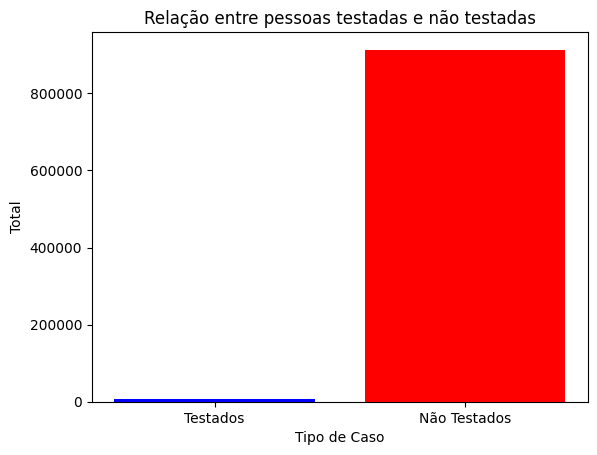

In [70]:
# calcula o total de casos testados
total_testado = df_entrevistados_testados.shape[0]

# calcula o total de pessoas não testadas
total_nao_testado = df_entrevistados_nao_testados.shape[0]

# cria uma lista com os totais
totais = [total_testado, total_nao_testado]

# cria labels do gráfico
labels = ['Testados', 'Não Testados']

# cria o gráfico
plt.bar(labels, totais, color=['blue', 'red'])

# configura o gráfico
plt.title('Relação entre pessoas testadas e não testadas') 
plt.xlabel('Tipo de Caso')
plt.ylabel('Total')
plt.show()